In [81]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [82]:
yelp = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/yelp.csv')

In [83]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [84]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


### Relationship between Vote Types ('cool', 'funny', 'useful') and 'stars'

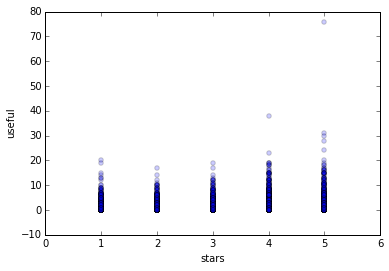

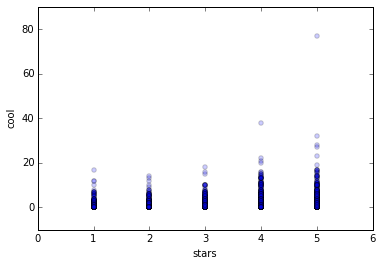

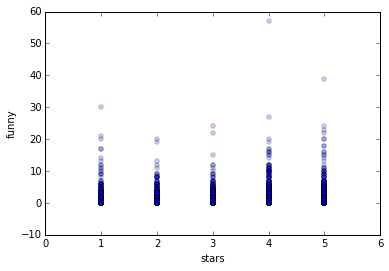

In [85]:
yelp.plot(kind='scatter', x='stars', y='useful', alpha=0.2)
yelp.plot(kind='scatter', x='stars', y='cool', alpha=0.2)
yelp.plot(kind='scatter', x='stars', y='funny', alpha=0.2)

### Defining features (X), and the response (y)

In [86]:
features = ['cool', 'funny', 'useful']
X = yelp[features]
y = yelp.stars
print(X.shape)
print(len(y))

(10000, 3)
10000


### Linear Regression:

In [87]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
print(linreg.coef_)

[ 0.27435947 -0.13567449 -0.14745239]


The first value relates to the slope of the regression line for 'cool' votes for a review against stars: for every 'cool point', the 'stars' given in the review are likely to be 'cool points' + the coefficient value. In this case, more 'cool points' indicates a more favorable review rating of the Yelp listing. For 'useful' and 'funny', however, it appears to be a negative slope, meaning that for each addition vote for 'funny' or 'useful', the star rating given in the review is more likely to be lower by -0.14 and -0.15 respectively. It would make sense that readers appreciate a heads-up that a Yelp listing is not that great ('useful' vote), and perhaps others providing negative reviews make a joke of the experience, thereby recieving 'funny' votes. 

However, it might be beneficial to apply a non-linear regression model, given that the charts above look U-shaped...

### Model Evaluation

In [89]:
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn import metrics

def train_test_rmse(features):
    X = yelp[features]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [90]:
print(train_test_rmse(['cool', 'funny', 'useful']))

1.17967927404


In [91]:
print(train_test_rmse(['cool','useful']))

1.1933895059


In [92]:
print(train_test_rmse(['cool', 'funny']))

1.192620245


In [93]:
print(train_test_rmse(['funny', 'useful']))

1.20938655233


So...removing any of the features only made the value higher, which is bad. We want the smallest error possible, so, with the features currently available, we want to use all of them.